<a href="https://colab.research.google.com/github/guilmoreira/mercado_financeiro/blob/main/comparativo_Ibovespa_investpy_e_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Funcionando

[*********************100%***********************]  1 of 1 completed
             Base de dados
---------------------------------------
            IBOV Investing  IBOV Yahoo
Date                                  
2020-01-02        118573.0    118573.0
2020-01-03        117707.0    117707.0
2020-01-06        116878.0    116878.0
2020-01-07        116662.0    116662.0
2020-01-08        116247.0    116247.0
---------------------------------------
Gráifoc IBOVESPA DAS DUAS BASES


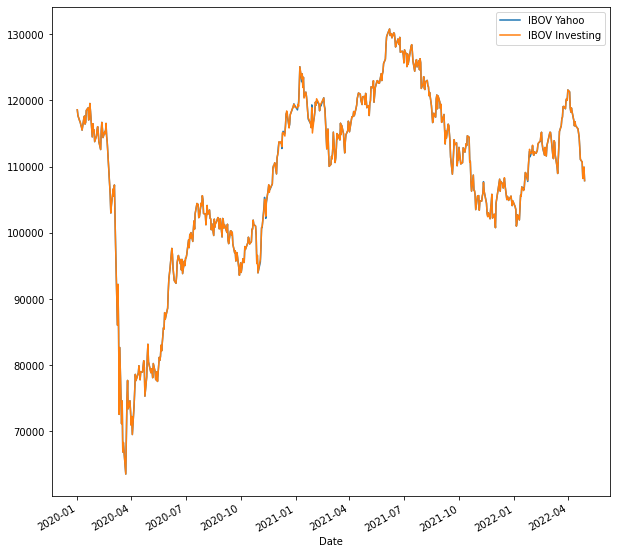

In [53]:
#Instalação
#!pip install yfinance
#!pip install investpy
#!pip install pandas as pd
#!pip install datetime
#!pip install kora -q

#Importação
import investpy
import yfinance as yf
import pandas as pd
import datetime

#PERIODO ESTUDADO
inicio_periodo="2020-01-01"
final_periodo="2022-05-01"

#CONVERTENDO FORMATO DE DATA
inicio_ft=datetime.datetime.strptime(inicio_periodo,'%Y-%m-%d').strftime('%d/%m/%Y')
final_ft=datetime.datetime.strptime(final_periodo,'%Y-%m-%d').strftime('%d/%m/%Y')

#YAHOO FINANCE
ibovespa_yahoo=pd.DataFrame(yf.download("^BVSP", start=inicio_periodo, end=final_periodo)['Adj Close'])
ibovespa_yahoo=ibovespa_yahoo.rename(columns={'Adj Close':'IBOV Yahoo'})

#INVESTPY
ibovespa_investing = pd.DataFrame(investpy.get_index_historical_data(index='Bovespa',from_date =inicio_ft, to_date =final_ft, country='Brazil')['Close'],)
ibovespa_investing=ibovespa_investing.rename(columns={'Close':'IBOV Investing'})

#COMPARAÇAO VIA GRÁFICO
comparativo=pd.merge(ibovespa_investing,ibovespa_yahoo, on='Date',how='inner')
print('             Base de dados')
print('---------------------------------------')
print(comparativo.head())
print('---------------------------------------')
print('Gráifoc IBOVESPA DAS DUAS BASES')
comparativo[['IBOV Yahoo', 'IBOV Investing']].plot(figsize = (10,10));

